# 自适应线性神经元（Adaline）

## 定义
自适应神经元是在感知机的基础上的一种改进。其激活函数不再是阶跃函数，而是线性连续函数

## 对比
|项目|自适应神经元|感知机|
|--|--|--|
|激活函数|线性激活函数|阶跃函数（Sign等）|
|损失函数|均方误差（MSE）|无|
|参数更新方式|梯度下降法|人为定义|
|应用|分类、回归|分类|

## 模型定义

* 输入：向量$x_i=[x_{i1}, x_{i2}, \cdots, x_{in}]^T, \ x \in \mathcal{R}^n$
* 权重：向量$\omega = [\omega_1, \omega_2, \cdots, \omega_n]^T, \ \omega \in \mathcal{R}^n$
* 偏置：$b, \ b\in \mathcal{R}$
* 输出：$o_i, \ o_i\in \mathcal{R}$
* 样本实际输出： $y_i, \ y_i \in mathcal{R}$
* 运算：$$o_i = purelin(\omega^Tx_i+b)$$

## 学习算法

### 一次性学习算法
$$\left\{ \begin{array}{rcl} \omega_1 \cdot x_{11} + \omega_2 \cdot x_{12} + \cdots + \omega_n \cdot x_{1n} + b = y_1 \\ \omega_1 \cdot x_{21} + \omega_2 \cdot x_{22} + \cdots + \omega_n \cdot x_{2n} + b = y_2 \\ \vdots \\ \omega_1 \cdot x_{m1} + \omega_2 \cdot x_{m2} + \cdots + \omega_n \cdot x_{mn} + b = y_m \\\end{array}\right.$$

可以得到

$$\left[ \begin{array}{cc} x_{11} & \cdots& x_{1n}& 1 \\ \vdots& \ddots& \vdots& \vdots \\ x_{m1}& \cdots& x_{mn} &1  \end{array}\right]  \left[ \begin{array}{cc} \omega_1 \\ \vdots \\ \omega_n \\ b \end{array}\right] = \left[ \begin{array}{cc} y_1 \\ \vdots \\ y_m \end{array} \right] $$

因此可以解得参数向量$$\textbf{W} = (X^TX)^{-1}X^TY$$

由于实际情况中，数据存在一定的噪声，上述的计算方法不一定有解。

### 迭代解法

Adaline的输出为：
$$o_i = \omega^Tx_i+b = W^TX_i \\ W^T = [\omega_1, \cdots, \omega_n, b]^T\\ X_i = [x_{i1}, \cdots, x_{in}, 1]$$

由此可得输出与真实值之间的绝对误差为
$$e(o_i) = y_i - o_i$$
绝对误差限位
$$e(o_i)_\epsilon = |y_i - o_i|$$
由二范数定义的输出与真实值之差的距离度量为
$$d(o_i-y_i)_2 = ||o_i-y_i||_2 = (o_i - y_i)^2$$

上述定义了输出和真实值之间的距离，因此优化目标即为减小这一差距

* **定义Adaline的损失函数**

在单个样本上的损失函数为$$L(\textbf{W})_i = (o_i - y_i)^2$$
在整个样本集上的损失函数为$$L(\textbf{W}) = \sum_{i=0}^m(o_i - y_i)^2$$

* **定义Adaline待解决的优化问题**
$$\min\limits_{\textbf{W}}L(\textbf{W}) = \sum_{i=0}^m(o_i - y_i)^2$$

**优化问题求解**

计算损失关于未知参数的偏导

$$\begin{split} \bigtriangledown_\textbf{W}L(\textbf{W}) &= \frac{\partial L(\textbf{W})}{\partial \textbf{W}} \\  &=\frac{\partial(\sum_{i=0}^m(o_i - y_i)^2)}{\partial(\textbf{W})} \\  &= \frac{\partial(\sum_{i=0}^m(W^TX_i - y_i)^2)}{\partial(\textbf{W})} \\ &=2\sum_{i=0}^m(W^TX_i - y_i)X_i \end{split} $$

得到未知参数的更新方程，对于第n+1次更新有
$$\textbf{W}(n+1) = \textbf{W}(n) - \eta \bigtriangledown_\textbf{W}(n)L(\textbf{W}(n))$$

其中 $\eta$为学习率

由上式即可得到全量梯度下降法(BGD)

* **全量梯度下降法(BGD)**
$$\begin{split} \textbf{W}(n+1) &= \textbf{W}(n) - \eta \bigtriangledown_\textbf{W}(n)L(\textbf{W}(n))\\ &=  \textbf{W}(n) - 2\eta\sum_{i=0}^m(W(n)^TX_i - y_i)X_i \end{split}$$
* **随机梯度下降法(SGD)**

定义第n+1次更新时取得的样本为
$$\{X(n+1), y(n+1)\}$$

可得
$$\begin{split} \textbf{W}(n+1) &= \textbf{W}(n) - \eta \bigtriangledown_\textbf{W}(n)L(\textbf{W}(n))\\ &=  \textbf{W}(n) - 2\eta(W(n)^TX(n+1) - y(n+1))X(n+1) \end{split}$$
* **小批量梯度下降法(MBGD)**

定义第n+1次更新时取得的样本集$S$一共有$s$个样本，
$$S(n+1) = \{(X_1(n+1), y_1(n+1)), (X_2(n+1), y_2(n+1)), \cdots, (X_s(n+1), y_s(n+1))\}, \ S(n+1) \subsetneq T$$

可得
$$\begin{split} \textbf{W}(n+1) &= \textbf{W}(n) - \eta \bigtriangledown_\textbf{W}(n)L(\textbf{W}(n))\\ &=  \textbf{W}(n) - 2\eta\sum_{i=0}^s(W(n)^TX_i(n+1) - y_i(n+1))X_i(n+1) \end{split}$$


### 训练流程

1. 随机初始化未知参数$\textbf{W}$
2. 训练循环
    1. 依照选用的梯度下降法（BGD、MBGD、SGD）传入样本
    2. 计算输出值
    3. 应用相应的参数更新方法更新参数
    4. 判断是否结束训练

### 测试

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import imageio
import os
import random
from sklearn.datasets import make_blobs, make_moons

# seed
random.seed(1024)
np.random.seed(1024)

In [62]:
# 定义模型

class Adeline(object):

    def __init__(self, input_dim=2, output_dim=1, eta=1) -> None:
        super().__init__()

        # 输入维度
        self.input_dim = input_dim

        # 输出维度
        self.output_dim = output_dim

        # 学习率
        self.eta = eta

        # 未知参数
        # (feature_len, 1)
        self.omega_list = np.random.randn(input_dim+1, 1)

        # 绘制记录
        self.draw_count = 0
    
    def train(self, input_x, output_y):
        """
        训练主函数
        """
        # output_y : (batch_szie, 1)
        output_y = np.array(output_y)

        # 扩展输入维度
        expand_ = np.ones((len(input_x), 1))
        # input_x : (batch_size, feature_len)
        input_x = np.concatenate((input_x, expand_), axis=1)

        # 获取预测输出
        # pred_y : (batch_size, 1)
        pred_y = np.matmul(input_x, self.omega_list)

        # 计算绝对误差
        # absolute_error : (batch_size, 1)
        absolute_error = output_y - pred_y

        # 计算Δ_w
        delta_omega = np.matmul(input_x.T, absolute_error) * 2 * self.eta

        # 计算更新后参数
        self.omega_list += delta_omega

        # 计算损失
        pred_y_new = np.matmul(input_x, self.omega_list)
        train_loss = np.mean(np.power(pred_y_new - output_y, 2))
        return train_loss
    
    def draw(self, input_x_list, output_y_list):
        """
        绘制
        """
        input_x_list = np.array(input_x_list.copy())
        input_dim = np.shape(input_x_list)[1]
        if np.shape(input_x_list)[1] != 2:
            raise ValueError("仅能绘制输入维度为2的结果，但是接受到的维度为{}".format(input_dim))
        
        # 绘制所有训练数据
        plt.cla()
        plt.scatter(input_x_list[:, 0], input_x_list[:, 1], c=output_y_list)

        # 绘制学到的分离面

        # x_1_point_list = np.lnspace(input_x_1_range[0]-0.1*x_1_len, input_x_1_range[1]+0.1*x_1_len)
        # 绘制直线
        # 分离平面 w x + b = 0
        # 对于二维输入,有
        # w1 x1 + w2 x2 + b = 0
        # x2 = (-b-w1 x1)/w2
        
        # 设置标记点
        input_x_1_range = [np.min(input_x_list[:, 0]), np.max(input_x_list[:, 0])]
        input_x_2_range = [np.min(input_x_list[:, 1]), np.max(input_x_list[:, 1])]
        # 区间长度
        x_1_len = input_x_1_range[1] - input_x_1_range[0]
        x_2_len = input_x_2_range[1] - input_x_2_range[0]

        point_x_1_list = np.linspace(input_x_1_range[0]-0.1*x_1_len, input_x_1_range[1]+0.1*x_1_len, 100)

        # 判断是否是y=c或者x=c
        if self.omega_list[0] == 0 and self.omega_list[1] == 0:
            # 均为0，为单点
            point_x_1_list = np.zeros_like(point_x_1_list)
            point_x_2_list = np.zeros_like(point_x_1_list)
        else:
            if self.omega_list[1] == 0:
                # x1 = c
                point_x_1_list = -np.ones_like(point_x_1_list) * self.omega_list[-1]/self.omega_list[0]
                point_x_2_list = np.linspace(input_x_2_range[0]-0.1*x_1_len, input_x_2_range[1]+0.1*x_1_len, len(point_x_1_list))
            elif self.omega_list[0] == 0:
                # x2 = c
                point_x_2_list = -np.ones_like(point_x_1_list) * self.omega_list[-1]/self.omega_list[1]
            else:
                point_x_2_list = -(self.omega_list[-1] + self.omega_list[0] * point_x_1_list)/self.omega_list[1]

        plt.plot(point_x_1_list, point_x_2_list, "-r")

        plt.xlim(input_x_1_range[0]-0.2*x_1_len, input_x_1_range[1]+0.2*x_1_len)
        plt.ylim(input_x_2_range[0]-0.2*x_2_len, input_x_2_range[1]+0.2*x_2_len)
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title("weight: {}".format(self.omega_list))

        plt.savefig("./images/temp/{}.png".format(self.draw_count), dpi=150)
        self.draw_count += 1
    
    def create_gif(self, output_name):
        """
        生成gif
        """
        with imageio.get_writer("./images/{}.gif".format(output_name), mode="I", fps=2) as Writer:
            for ind in range(self.draw_count):
                image = imageio.imread("./images/temp/{}.png".format(ind))
                os.remove("./images/temp/{}.png".format(ind))
                Writer.append_data(image)
        

# 数据
class DataCreator(object):

    def __init__(self) -> None:
        super().__init__()

    @staticmethod
    def get_and_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, -1, -1, 1]
        return x_list, y_list

    @staticmethod
    def get_or_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, 1, 1, 1]
        return x_list, y_list

    @staticmethod
    def get_nor_data(nor_index):
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = list()
        for i in range(len(x_list)):
            if x_list[i][nor_index]:
                y_list.append(-1)
            else:
                y_list.append(1)
        
        return x_list, y_list

    @staticmethod
    def get_xor_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, 1, 1, -1]
        return x_list, y_list

    @staticmethod
    def get_moon_data(sample_num, noise=0.05):
        x_list, y_list = make_moons(sample_num, noise=noise, random_state=1024)
        y_list = y_list * 2 - 1
        return x_list, y_list

    @staticmethod
    def get_blob_data(sample_num, std=0.6):
        x_list, y_list = make_blobs(n_samples=sample_num, centers=2, 
                                    cluster_std=0.6, random_state=1024)
        y_list = y_list * 2 - 1
        return x_list, y_list

# 数据集
class DataSet(object):

    def __init__(self, input_x_list, output_y_list) -> None:
        super().__init__()

        self.input_x = input_x_list
        self.output_y = output_y_list

    def __len__(self):
        return len(self.input_x)
    
    def __getitem__(self, item):
        input_x = self.input_x[item]
        output_y = np.array(self.output_y[item]).reshape((1, -1))

        return {"input": input_x, "output": output_y}
    
    @staticmethod
    def collate_fn(batch):
        input_x = np.array([s["input"] for s in batch])
        output_y = np.array([s["output"][0] for s in batch])
        return {"inputs": input_x, "label": output_y}


# 数据加载器迭代器
class DataLoaderIter(object):

    def __init__(self, data_set, iter_index) -> None:
        super().__init__()
        self.data_set = data_set
        self.iter_index = iter_index
        self.counter = 0
        self.max_iter = len(self.iter_index)
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.counter == self.max_iter:
            raise StopIteration
        else:
            index_list = self.iter_index[self.counter]
            batch_data = list()

            # 获取数据
            for ind in index_list:
                batch_data.append(self.data_set.__getitem__(ind))
            # 整合数据
            return_data = self.data_set.collate_fn(batch_data)
            self.counter += 1
            return return_data



# 数据加载器
class DataLoader(object):

    def __init__(self, dataset, batch_size, shuffle) -> None:
        super().__init__()

        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

        # 迭代器
        # 索引分段
        split_index = np.arange(0, len(self.dataset), self.batch_size)[1:]
        # 迭代列表
        if self.shuffle:
            iter_num = np.random.permutation(len(self.dataset))
        else:
            iter_num = np.arange(0, len(self.dataset), 1)
        
        # 获取迭代索引列表
        self.iter_index_list = np.hsplit(iter_num, split_index)

    def __iter__(self):
        # 定义迭代器
        self.DataIter = DataLoaderIter(self.dataset, self.iter_index_list)
        return self.DataIter


In [6]:
# 正式测试
%matplotlib inline

### and逻辑

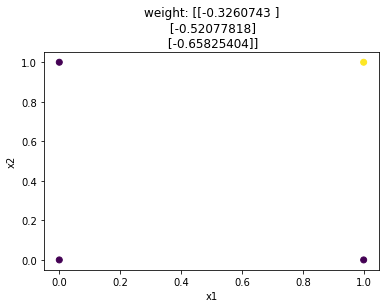

In [64]:
# and

# 模型
adaline_model = Adeline(eta=0.01)
# 数据生成器
data_creator = DataCreator()
# 最大训练次数
max_epoch = 1
# 获取训练数据
train_x_all, train_y_all = data_creator.get_and_data()

# 训练方式
# 可选 BGD、SGD、MBGD
train_method = "MBGD"
# batch size
# 若为BGD，则batch_size为所有训练数据的总和
# 若为SGD，则batch_size为1
# 若为MBGD，则batch_size为自定义批大小，大于1小于所有训练数据的总和
if train_method == "BGD":
    batch_size = len(train_x_all)
elif train_method == "MBGD":
    batch_size = 2
else:
    batch_size = 1

# 训练集
train_dataset = DataSet(train_x_all, train_y_all)
# 数据加载器
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
train_num = len(train_y_all)

for epoch in range(max_epoch):
    for batch_loop, batch_ in enumerate(train_dataloader):
        # 读取数据
        train_x = batch_["inputs"]
        train_y = batch_["label"]

        # 训练
        train_loss = adaline_model.train(train_x, train_y)
    
    adaline_model.draw(train_x_all, train_y_all)

adaline_model.draw(train_x_all, train_y_all)
adaline_model.create_gif("add_adaline")
plt.show()